<a href="https://colab.research.google.com/github/Cris12Mainz/Topological-Defects/blob/main/GNNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.9 MB/s eta 0:00:00


In [2]:
import torch
from torch_geometric.data import Data
import numpy as np

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import Delaunay
import matplotlib.tri as mtri
from array import array
from collections import defaultdict
from matplotlib.patches import Rectangle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
df_261 = pd.read_csv('/content/drive/MyDrive/vel_inout/vel_clu261.dat', delim_whitespace=True) #reading data
#print(df)
#setting names to the columms
df_262 = pd.read_csv('/content/drive/MyDrive/vel_inout/vel_clu262.dat', delim_whitespace=True) #reading data
#print(df)
#setting names to the columms
df_261.columns =['index', 'x-coord','y-coord', 'ignore4', 'ignore5', 'x-vel','y-vel', 'ignore8','ignore9','ignore10','ignore11','ignore12','ignore13','ignore14','ignore15']
#df.columns =['index', 'x-coord','y-coord', 'ignore4', 'ignore5', 'x-vel','y-vel']

df_262.columns =['index', 'x-coord','y-coord', 'ignore4', 'ignore5', 'x-vel','y-vel', 'ignore8','ignore9','ignore10','ignore11','ignore12','ignore13','ignore14','ignore15']
#df.columns =['index', 'x-coord','y-coord', 'ignore4', 'ignore5', 'x-vel','y-vel']


data = pd.DataFrame(df_261)
test = pd.DataFrame(df_262)

#Taking the important columms -> position and velocity

points= df_261[['x-coord', 'y-coord']].to_numpy()
points2= df_262[['x-coord', 'y-coord']].to_numpy()

/tmp/ipython-input-3428125258.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_261 = pd.read_csv('/content/drive/MyDrive/vel_inout/vel_clu261.dat', delim_whitespace=True) #reading data
/tmp/ipython-input-3428125258.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_262 = pd.read_csv('/content/drive/MyDrive/vel_inout/vel_clu262.dat', delim_whitespace=True) #reading data


In [59]:
print(points2)

[[ 42.927857   9.935563]
 [ 28.381596 116.991131]
 [ 23.210268 117.701909]
 ...
 [ 51.862407  64.522369]
 [ 20.181869  60.36423 ]
 [ 12.338315   9.732161]]


In [61]:
import numpy as np
minX, maxX, minY, maxY = 0, 80, 0, 80 # Define your region

# Create a boolean mask for points
mask_points = (points[:, 0] >= minX) & (points[:, 0] <= maxX) & \
              (points[:, 1] >= minY) & (points[:, 1] <= maxY)

# Create a boolean mask for points2
mask_points2 = (points2[:, 0] >= minX) & (points2[:, 0] <= maxX) & \
               (points2[:, 1] >= minY) & (points2[:, 1] <= maxY)

positions = points[mask_points] # Apply the mask to points
test = points2[mask_points2] # Apply the mask to points2
print(positions)
print(test)

[[43.120961  9.992184]
 [35.557554 22.70502 ]
 [40.231706 79.482365]
 ...
 [51.98752  64.269727]
 [20.258985 60.163291]
 [12.490876  9.694664]]
[[42.927857  9.935563]
 [35.671394 22.227833]
 [40.593358 79.861599]
 ...
 [51.862407 64.522369]
 [20.181869 60.36423 ]
 [12.338315  9.732161]]


In [63]:
tri = Delaunay(positions)
tri_test= Delaunay(test)
# adjacency list
neighbors = [[] for _ in range(len(positions))]
neighbors_test = [[] for _ in range(len(test))]
#Simplex is a triangle!
#simplex = [a,b,c] where a,b,c are the numbers of the particles. positions[a] = position of particle #a
for simplex in tri.simplices:
    for i in range(3):
        a = simplex[i] #0,1,2
        b = simplex[(i+1)%3] # 1,2,0
        neighbors[a].append(b)
        #neighbors[b].append(a)
for simplex in tri_test.simplices:
    for i in range(3):
        a = simplex[i] #0,1,2
        b = simplex[(i+1)%3] # 1,2,0
        neighbors_test[a].append(b)
        #neighbors[b].append(a)

In [66]:
edges = [[0,0]]
#edges= set()
for i in range(len(positions)):
    for j in neighbors[i]:
        #b=[i,j]
        edges= np.vstack((edges,[i,j]))
        #edges.add(tuple(sorted((i, j))))
edges = np.delete(edges,0,0)

edges_test = [[0,0]]
#edges= set()
for i in range(len(test)):
    for j in neighbors_test[i]:
        #b=[i,j]
        edges_test= np.vstack((edges,[i,j]))
        #edges.add(tuple(sorted((i, j))))
edges_test = np.delete(edges_test,0,0)

In [69]:
print(edges);
print(edges_test);

[[   0 1155]
 [   0 2429]
 [   0 7390]
 ...
 [7408  365]
 [7408 1195]
 [7408 1701]]
[[   0 2429]
 [   0 7390]
 [   0  272]
 ...
 [7408 1195]
 [7408 1701]
 [7413  366]]


In [70]:
def coordination_numbers(neighbors):
    return np.array([len(nbrs) for nbrs in neighbors])
k = coordination_numbers(neighbors)
k_test = coordination_numbers(neighbors_test)

In [71]:
print(k)
print(k_test)

[6 6 5 ... 6 6 6]
[6 6 4 ... 6 6 6]


In [72]:
# labels: node-level labels: 0=normal,1=five,2=seven
labels = np.zeros(len(positions), dtype=int)
labels[k==5] = 1
labels[k==7] = 2

labels_test = np.zeros(len(test), dtype=int)
labels_test[k_test==5] = 1
labels_test[k_test==7] = 2

In [73]:
print(labels)
print(labels_test)

[0 0 1 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [78]:
x = np.column_stack([positions, k])
x = torch.tensor(x, dtype=torch.float)

edge_index = torch.tensor(edges, dtype=torch.long) .t() #transpose of edge

y = torch.tensor(labels, dtype=torch.long)

data = Data(x=x, edge_index=edge_index, y=y)

In [76]:
x_test = np.column_stack([test, k_test])
x_test = torch.tensor(x_test, dtype=torch.float)

edge_index_test = torch.tensor(edges_test, dtype=torch.long) .t() #transpose of edge

y_test = torch.tensor(labels_test, dtype=torch.long)

data_test = Data(x=x_test, edge_index=edge_index_test, y=y_test)

In [79]:
print(data)
print(data_test)

Data(x=[7409, 3], edge_index=[2, 44349], y=[7409])
Data(x=[7414, 3], edge_index=[2, 44349], y=[7414])


In [38]:
print(data.x)
print(data.edge_index)
print(data.y)

tensor([[43.1210,  9.9922,  6.0000],
        [35.5576, 22.7050,  6.0000],
        [40.2317, 79.4824,  5.0000],
        ...,
        [51.9875, 64.2697,  6.0000],
        [20.2590, 60.1633,  6.0000],
        [12.4909,  9.6947,  6.0000]])
tensor([[   0, 1155],
        [   0, 2429],
        [   0, 7390],
        ...,
        [7408,  365],
        [7408, 1195],
        [7408, 1701]])
tensor([0, 0, 1,  ..., 0, 0, 0])


x = 7409 nodes, dimenison 3 -> (x,y,k)

edges = 44349 edges -> dimension 2 (i,j)

y = 7409 labels

In [80]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GraphConv

class SimpleGNN(nn.Module):
    def __init__(self, in_dim=3, hidden=64, num_classes=3):
        super().__init__()
        self.conv1 = GraphConv(in_dim, hidden)
        self.conv2 = GraphConv(hidden, hidden)
        self.lin = nn.Linear(hidden, num_classes)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.lin(x)
        return x


In [81]:
# Compute class weights
class_counts = torch.bincount(data.y)
weights = 1.0 / (class_counts.float() + 1e-6)
weights = weights / weights.sum()  # normalize
loss_fn = nn.CrossEntropyLoss(weight=weights)

# Optimizer
model = SimpleGNN()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [82]:
model.train()
epochs = 200

for epoch in range(epochs):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)   # forward pass
    loss = loss_fn(out, data.y)            # compute loss
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        pred = out.argmax(dim=1)
        acc = (pred == data.y).float().mean()
        print(f"Epoch {epoch}, Loss={loss.item():.4f}, Acc={acc:.4f}")


Epoch 0, Loss=44.0027, Acc=0.7059
Epoch 20, Loss=6.0491, Acc=0.2915
Epoch 40, Loss=3.1277, Acc=0.0711
Epoch 60, Loss=3.9194, Acc=0.0736
Epoch 80, Loss=2.2536, Acc=0.1386
Epoch 100, Loss=4.3340, Acc=0.6399
Epoch 120, Loss=2.2954, Acc=0.8183
Epoch 140, Loss=4.6657, Acc=0.1000
Epoch 160, Loss=4.0694, Acc=0.0736
Epoch 180, Loss=1.7337, Acc=0.6592


In [48]:
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)   # raw logits
    pred = out.argmax(dim=1)

In [84]:
model.eval()
with torch.no_grad():
    out = model(data_test.x, data_test.edge_index)
    pred = out.argmax(dim=1)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix




print(classification_report(data_test.y.numpy(), pred.numpy(), digits=4))

# Confusion matrix
cm = confusion_matrix(data_test.y.cpu(), pred.cpu())
print(cm)

              precision    recall  f1-score   support

           0     0.9556    0.0587    0.1107      6962
           1     0.0421    0.5309    0.0780       307
           2     0.0193    0.4138    0.0368       145

    accuracy                         0.0852      7414
   macro avg     0.3390    0.3345    0.0752      7414
weighted avg     0.8995    0.0852    0.1079      7414

[[ 409 3633 2920]
 [  11  163  133]
 [   8   77   60]]


In [50]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = data.y.numpy()
y_pred = pred.numpy()

# Print per-class precision, recall, F1
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)

              precision    recall  f1-score   support

           0     0.9961    0.3689    0.5384      6967
           1     0.1623    0.9738    0.2782       305
           2     0.0427    0.9343    0.0816       137

    accuracy                         0.4042      7409
   macro avg     0.4004    0.7590    0.2994      7409
weighted avg     0.9442    0.4042    0.5192      7409

Confusion matrix:
 [[2570 1528 2869]
 [   6  297    2]
 [   4    5  128]]


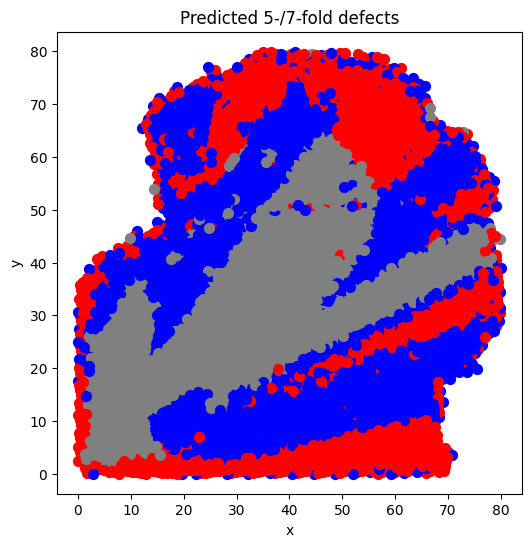

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
colors = ['gray', 'red', 'blue']  # normal=gray, 5-fold=red, 7-fold=blue

for i in range(len(data.x)):
    plt.scatter(data.x[i,0], data.x[i,1], color=colors[y_pred[i]], s=10)

plt.title("Predicted 5-/7-fold defects")
plt.xlabel("x"); plt.ylabel("y")
plt.axis("equal")
plt.show()